![MLU Logo](../data/MLU_Logo.png)

# <a name="0">Machine Learning Accelerator - Tabular Data - Lecture 1</a>


## Final Project 

In this notebook, we build a ML model to predict the __Time at Center__ field of our final project dataset.

1. <a href="#1">Read the dataset</a> (Given) 
2. <a href="#2">Train a model</a> (Implement)
    * <a href="#21">Exploratory Data Analysis</a>
    * <a href="#22">Select features to build the model</a>
    * <a href="#23">Data processing</a>
    * <a href="#24">Model training</a>
3. <a href="#3">Make predictions on the test dataset</a> (Implement)
4. <a href="#4">Write the test predictions to a CSV file</a> (Given)

__Austin Animal Center Dataset__:

In this exercise, we are working with pet adoption data from __Austin Animal Center__. We have two datasets that cover intake and outcome of animals. Intake data is available from [here](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) and outcome is from [here](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238). 

In order to work with a single table, we joined the intake and outcome tables using the "Animal ID" column and created a training.csv, test_features.csv and y_test.csv files. Similar to our review dataset, we didn't consider animals with multiple entries to the facility to keep it simple. If you want to see the original datasets, they are available under data/review folder: Austin_Animal_Center_Intakes.csv, Austin_Animal_Center_Outcomes.csv.

__Dataset schema:__ 
- __Pet ID__ - Unique ID of pet
- __Outcome Type__ - State of pet at the time of recording the outcome
- __Sex upon Outcome__ - Sex of pet at outcome
- __Name__ - Name of pet 
- __Found Location__ - Found location of pet before entered the center
- __Intake Type__ - Circumstances bringing the pet to the center
- __Intake Condition__ - Health condition of pet when entered the center
- __Pet Type__ - Type of pet
- __Sex upon Intake__ - Sex of pet when entered the center
- __Breed__ - Breed of pet 
- __Color__ - Color of pet 
- __Age upon Intake Days__ - Age of pet when entered the center (days)
- __Time at Center__ - Time at center (0 = less than 30 days; 1 = more than 30 days). This is the value to predict. 


In [1]:
%pip install -q -r ../requirements.txt

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## 1. <a name="1">Read the datasets</a> (Given)
(<a href="#0">Go to top</a>)

Let's read the datasets into dataframes, using Pandas.

In [2]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('../data/review/review_dataset.csv')

## 2. <a name="2">Train a model</a> (Implement)
(<a href="#0">Go to top</a>)

 * <a href="#21">Exploratory Data Analysis</a>
 * <a href="#22">Select features to build the model</a>
 * <a href="#23">Data processing</a>
 * <a href="#24">Model training</a>

### 2.1 <a name="21">Exploratory Data Analysis</a> 
(<a href="#2">Go to Train a model</a>)

We look at number of rows, columns and some simple statistics of the dataset.

In [3]:
# Implement here

data.head()

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Age upon Outcome Days
0,A794011,1.0,Neutered Male,Chunk,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White,730,730
1,A776359,1.0,Neutered Male,Gizmo,7201 Levander Loop in Austin (TX),Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,White/Brown,365,365
2,A674754,0.0,Intact Male,NaN,12034 Research in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,6,6
3,A689724,1.0,Neutered Male,*Donatello,2300 Waterway Bnd in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Black,60,60
4,A680969,1.0,Neutered Male,*Zeus,4701 Staggerbrush Rd in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,White/Orange Tabby,7,60


In [4]:
# Let's see the data types and non-null valies for each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95485 entries, 0 to 95484
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pet ID                 95485 non-null  object 
 1   Outcome Type           95485 non-null  float64
 2   Sex upon Outcome       95484 non-null  object 
 3   Name                   59138 non-null  object 
 4   Found Location         95485 non-null  object 
 5   Intake Type            95485 non-null  object 
 6   Intake Condition       95485 non-null  object 
 7   Pet Type               95485 non-null  object 
 8   Sex upon Intake        95484 non-null  object 
 9   Breed                  95485 non-null  object 
 10  Color                  95485 non-null  object 
 11  Age upon Intake Days   95485 non-null  int64  
 12  Age upon Outcome Days  95485 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 9.5+ MB


In [5]:
# Print basic statistics for numerical columns

data.describe()

,Outcome Type,Age upon Intake Days,Age upon Outcome Days
count,95485.000000,95485.000000,95485.000000
mean,0.564005,703.436959,717.757313
std,0.495889,1052.252197,1055.023160
min,0.000000,0.000000,0.000000
25%,0.000000,30.000000,60.000000
50%,1.000000,365.000000,365.000000
75%,1.000000,730.000000,730.000000
max,1.000000,9125.000000,9125.000000


Separate model features and model target

In [6]:
print(data.columns)

Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color', 'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')


In [7]:
model_features = data.columns.drop('Outcome Type')
model_target = 'Outcome Type'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color',
       'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')
Model target:  Outcome Type


Figure out which features are numerical and which are categorical (acknowledging that some integer valued features could actually be categorical features, and that some categorical features could be text features).

In [8]:
import numpy as np

numerical_features_all = data[model_features].select_dtypes(include=np.number).columns
print('Numerical columns: ', numerical_features_all)

print('')

categorical_features_all = data[model_features].select_dtypes(include='object').columns
print('Categorical columns: ', categorical_features_all)

Numerical columns:  Index(['Age upon Intake Days', 'Age upon Outcome Days'], dtype='object')

Categorical columns:  Index(['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color'],
      dtype='object')


### Target Distribution

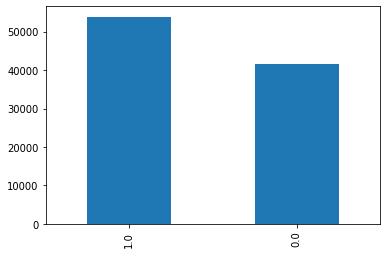

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

data[model_target].value_counts().plot.bar()
plt.show()

Note: we shoudl only fix the imbalance in training set, without changing the validation and test sets, as those should follow the original distribution.

### Categorical Features Analysis

In [10]:
for c in categorical_features_all: 
    print(data[c].value_counts())

A800905    1
A700411    1
A722635    1
A792583    1
A710866    1
          ..
A772128    1
A805799    1
A775150    1
A716120    1
A764512    1
Name: Pet ID, Length: 95485, dtype: int64
Neutered Male    30244
Spayed Female    28145
Intact Female    13724
Intact Male      13646
Unknown           9725
Name: Sex upon Outcome, dtype: int64
Bella        338
Luna         313
Max          311
Daisy        239
Lucy         223
            ... 
Shimi          1
Diezle         1
Spokesman      1
*Flour         1
Juni           1
Name: Name, Length: 17468, dtype: int64
Austin (TX)                               14833
Travis (TX)                                1402
7201 Levander Loop in Austin (TX)           644
Outside Jurisdiction                        607
Del Valle (TX)                              426
                                          ...  
Oak Springs And Tillery in Austin (TX)        1
7201 Meadowood Drive in Austin (TX)           1
3401 N Lamar Blvd in Austin (TX)              1
2002

Categorical/text features that won't be included in the model:
- Pet Id
- Found Location 

### 2.2 <a name="22">Select features to build the model</a> 
(<a href="#2">Go to Train a model</a>)


In [11]:
# Grab model features/inputs and target/outputs

# Keeping all numerical features as they might be useful
numerical_features = [
    'Age upon Intake Days', 
    'Age upon Outcome Days'
]

# Grabbing the categorical columns that I think are useful (dropping Pet Id)
categorical_features = [
    'Sex upon Outcome',
    'Intake Type',
    'Intake Condition',
    'Pet Type'
    # 'Sex upon Intake' -- decided to leave this out
]

# Grabbing the text features
text_features = [
    'Color',
    'Breed'
    # 'Found Location' -- decided to leave this out
    # 'Name' -- decided to leave this out
]

model_features = numerical_features + categorical_features + text_features
model_target = 'Outcome Type'

##### Cleaning numerical features

Age upon Intake Days


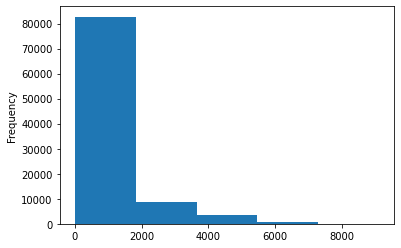

Age upon Outcome Days


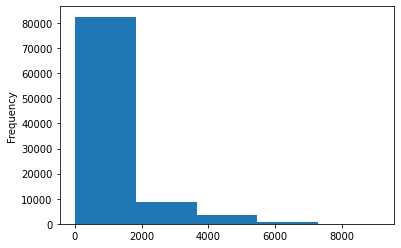

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in numerical_features:
    print(c)
    data[c].plot.hist(bins=5)
    plt.show()

There look to be a lot of values in the first bin, let's check for min values.

In [13]:
for c in numerical_features:
    print(c)
    print('min: ', data[c].min())
    print('max: ', data[c].max())

Age upon Intake Days
min:  0
max:  9125
Age upon Outcome Days
min:  0
max:  9125


Let's increase the number of histogram bins to 10 for more bins. This will give me a more refined view of the numerical features.

In [14]:
for c in numerical_features:
    print(c)
    print(data[c].value_counts(bins=10, sort=False))
    plt.show()

Age upon Intake Days
(-9.126, 912.5]     74835
(912.5, 1825.0]     10647
(1825.0, 2737.5]     3471
(2737.5, 3650.0]     3998
(3650.0, 4562.5]     1234
(4562.5, 5475.0]     1031
(5475.0, 6387.5]      183
(6387.5, 7300.0]       79
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: Age upon Intake Days, dtype: int64
Age upon Outcome Days
(-9.126, 912.5]     74642
(912.5, 1825.0]     10699
(1825.0, 2737.5]     3465
(2737.5, 3650.0]     4080
(3650.0, 4562.5]     1263
(4562.5, 5475.0]     1061
(5475.0, 6387.5]      187
(6387.5, 7300.0]       81
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: Age upon Outcome Days, dtype: int64


Let's check missing values for these numerical features.

In [15]:
print(data[numerical_features].isna().sum())

Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64


Looks like there aren't missing values. That said, it's likely the employees at the center put "0" if the age of the pet cannot be guessed.

##### Cleaning categorical features

In [16]:
for c in categorical_features:
    print(c)
    print(data[c].unique())

Sex upon Outcome
['Neutered Male' 'Intact Male' 'Intact Female' 'Unknown' 'Spayed Female'
 nan]
Intake Type
['Owner Surrender' 'Stray' 'Wildlife' 'Public Assist' 'Euthanasia Request'
 'Abandoned']
Intake Condition
['Normal' 'Nursing' 'Sick' 'Injured' 'Aged' 'Feral' 'Pregnant' 'Other'
 'Behavior' 'Medical']
Pet Type
['Cat' 'Dog' 'Other' 'Bird' 'Livestock']


Let's have a check on missing values for the categorical features (and text features here).

In [17]:
print(data[categorical_features + text_features].isna().sum())

Sex upon Outcome    1
Intake Type         0
Intake Condition    0
Pet Type            0
Color               0
Breed               0
dtype: int64


We'll wait to convert the categoricals into useful numerical features until after we evaluate the train/test data values.

##### Cleaning text features

Time to look at the text fields, where cleaning can be performed here (but should be done on the train/test data).

In [18]:
for c in text_features:
    print(c)
    print(data[c].unique())

Color
['Brown Tabby/White' 'White/Brown' 'Orange Tabby' 'Black'
 'White/Orange Tabby' 'Blue/White' 'Brown Tabby' 'Gray' 'Calico'
 'Brown/Black' 'White/Tan' 'White' 'Brown' 'Black/White' 'Brown/White'
 'Black/Brown' 'Chocolate/White' 'Red' 'White/White' 'Brown Brindle/White'
 'Gray/Black' 'Tortie' 'Tan' 'White/Blue Tabby' 'Brown/Brown' 'Black/Gray'
 'Blue' 'Cream Tabby' 'Brown/Gray' 'Blue Tabby/White' 'Red/White'
 'Orange Tabby/White' 'Brown Merle/White' 'Tricolor' 'Apricot' 'Black/Tan'
 'Tortie Point' 'Tan/Black' 'Torbie/Brown Tabby' 'White/Black'
 'Blue Tabby' 'Blue Tick' 'White/Gray' 'Black/Tricolor' 'Chocolate/Tan'
 'White/Brown Tabby' 'White/Brown Brindle' 'Lynx Point' 'Buff' 'Torbie'
 'White/Buff' 'Brown Brindle' 'Cream' 'White/Blue' 'Blue/Tan'
 'Black Brindle/White' 'Black/Yellow Brindle' 'Chocolate/Black'
 'Black/Red' 'Fawn/White' 'Chocolate' 'Blue/Brown Brindle' 'Tan/White'
 'Cream Tabby/White' 'Tan/Gray' 'Sable' 'Red/Buff' 'Blue Merle'
 'Lynx Point/White' 'Yellow' 'Black/Brown

In [19]:
# Prepare cleaning functions
import re, string
import nltk
from nltk.stem import SnowballStemmer

stop_words = ['a', 'an', 'the', 'this', 'that', 'is', 'it', 'to', 'and']

stemmer = SnowballStemmer('english')

def pre_process_text(text):
    # lowercase and strip leading/trailing white space
    text = text.lower().strip()
    
    # remove HTML tags
    text = re.compile('<.*?>').sub('', text)
    
    # remove punctuation
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    
    # remove extra white space
    text = re.sub('\s+', ' ', text)
    
    return text

def lexicon_process(text, stop_words, stemmer):
    filtered_sentence = []
    words = text.split(" ")
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(stemmer.stem(w))
    text = " ".join(filtered_sentence)
    
    return text

def clean_sentence(text, stop_words, stemmer):
    return lexicon_process(pre_process_text(text), stop_words, stemmer)

# clean the text features
for c in text_features:
    print('Text cleaning: ', c)
    data[c] = [clean_sentence(item, stop_words, stemmer) for item in data[c].values]

Text cleaning:  Color
Text cleaning:  Breed


### 2.3 <a name="23">Training and Test Datasets</a> 

Let's split our dataset into training (90%) and test (10%) subsets.

In [20]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.1, shuffle=True, random_state=23)

##### Target balancing

In [21]:
print('Training set shape: ', train_data.shape)

print('Class 0 samples in the training set: ', sum(train_data[model_target] == 0))
print('Class 1 samples in the training set: ', sum(train_data[model_target] == 1))

print('Class 0 samples in the test set: ', sum(test_data[model_target] == 0))
print('Class 1 samples in the test set: ', sum(test_data[model_target] == 1))

Training set shape:  (85936, 13)
Class 0 samples in the training set:  37499
Class 1 samples in the training set:  48437
Class 0 samples in the test set:  4132
Class 1 samples in the test set:  5417


We only need to fix the imbalance in the training set and leave the validation/test datasets alone.

In [22]:
from sklearn.utils import shuffle

class_0_no = train_data[train_data[model_target] == 0]
class_1_no = train_data[train_data[model_target] == 1]

upsampled_class_0_no = class_0_no.sample(n=len(class_1_no), replace=True, random_state=42)

train_data = pd.concat([class_1_no, upsampled_class_0_no])
train_data = shuffle(train_data)

In [23]:
print('Training set shape: ', train_data.shape)

print('Class 1 samples in the training set: ', sum(train_data[model_target] == 1))
print('Class 0 samples in the training set: ', sum(train_data[model_target] == 0))

Training set shape:  (96874, 13)
Class 1 samples in the training set:  48437
Class 0 samples in the training set:  48437


### 2.4 <a name="23">Data Processing</a> 
(<a href="#2">Go to Train a model</a>)


For the numerical features, we will impute missing values with the mean using sklearn's SimpleImputer.

For the categorical features, we will impute with a placeholder value ("Unknown") and encode with sklearn's OneHotEncoder.

For our text features, we will build a pipeline for each of our text features to avoid issues with memory usage.

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer

# Preprocess the numerical features
numerical_processor = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean'))
])

# Preprocess the categorical features
categorical_processor = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocess 1st text feature
text_processor_0 = Pipeline([
    ('text_vect_0', CountVectorizer(binary=True, max_features=50))
])

# Preprocess 2nd text feature
text_processor_1 = Pipeline([
    ('text_vect_1', CountVectorizer(binary=True, max_features=150))
])

# Combine all data preprocessors from above
# For each processor/step specify: a name, the actual process, and finally the features to be processed
data_preprocessor = ColumnTransformer([
    ('numerical_pre', numerical_processor, numerical_features),
    ('categorical_pre', categorical_processor, categorical_features),
    ('text_pre_0', text_processor_0, text_features[0]),
    ('text_pre_1', text_processor_1, text_features[1])
])

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Pipeline creation
pipeline = Pipeline([
    ('data_preprocessing', data_preprocessor),
    ('dt', DecisionTreeClassifier())
])

In [26]:
# Visualize the pipeline
from sklearn import set_config

set_config(display='diagram')
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer())]),
                                                  ['Age upon Intake Days',
                                                   'Age upon Outcome Days']),
                                                 ('categorical_pre',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex upon Outcome',
                                                   'Intake Type',
                                                   'Intake Condition',
                                                   'Pet Type']),
                                                 ('text_pre_0',
                                                  Pipeline(steps=[('text_vect_0',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=50))]),
                                                  'Color'),
                                                 ('text_pre_1',
                                                  Pipeline(steps=[('text_vect_1',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=150))]),
                                                  'Breed')])),
                ('dt', DecisionTreeClassifier())])

### 2.4 <a name="24">Model training</a> 
(<a href="#2">Go to Train a model</a>)


In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Get train data to train the pipeline
X_train = train_data[model_features]
y_train = train_data[model_target]

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer())]),
                                                  ['Age upon Intake Days',
                                                   'Age upon Outcome Days']),
                                                 ('categorical_pre',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex upon Outcome',
                                                   'Intake Type',
                                                   'Intake Condition',
                                                   'Pet Type']),
                                                 ('text_pre_0',
                                                  Pipeline(steps=[('text_vect_0',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=50))]),
                                                  'Color'),
                                                 ('text_pre_1',
                                                  Pipeline(steps=[('text_vect_1',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=150))]),
                                                  'Breed')])),
                ('dt', DecisionTreeClassifier())])

In [28]:
# Use the fitted pipeline to make predictions on the train dataset
train_predictions = pipeline.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print('Accuracy (training): ', accuracy_score(y_train, train_predictions))

[[46072  2365]
 [ 3124 45313]]
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     48437
         1.0       0.95      0.94      0.94     48437

    accuracy                           0.94     96874
   macro avg       0.94      0.94      0.94     96874
weighted avg       0.94      0.94      0.94     96874

Accuracy (training):  0.943338769948593


High precision and high accuracy scores. Good start, but let's check how it performs on the test data.

In [30]:
# Get test data to test the pipeline

X_test = test_data[model_features]
y_test = test_data[model_target]

test_predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print('Accuracy (test): ', accuracy_score(y_test, test_predictions))

[[3119 1013]
 [ 944 4473]]
              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76      4132
         1.0       0.82      0.83      0.82      5417

    accuracy                           0.80      9549
   macro avg       0.79      0.79      0.79      9549
weighted avg       0.79      0.80      0.79      9549

Accuracy (test):  0.7950570740391664


Not bad, but I want to see if this can be improved by doing some hyperparameter tuning. I will be using GridSearchVC to look for combinations that can improve the accuracy on the test data.

In [31]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Parameter grid for GridSearch
param_grid={
    'dt__max_depth': [100, 200, 300],
    'dt__min_samples_leaf': [5, 10, 15],
    'dt__min_samples_split': [2, 5, 15]
}

grid_search = GridSearchCV(
    pipeline, # base model
    param_grid, # parameters to try
    cv = 5, # apply 5-fold cross validation
    verbose = 1, # print summary
    n_jobs = 1 #use all available processors
)

# Fit the GridSearch to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('data_preprocessing',
                                        ColumnTransformer(transformers=[('numerical_pre',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Age '
                                                                          'upon '
                                                                          'Intake '
                                                                          'Days',
                                                                          'Age '
                                                                          'upon '
                                                                          'Outcome '
                                                                          'Days']),
                                                                        ('categorical_pre',
                                                                         Pipeline(steps=[('cat_imputer',
                                                                                          SimpleImputer(fill_value='Unknown',
                                                                                                        strategy='constant')),
                                                                                         ('cat_encoder',
                                                                                          OneHotE...
                                                                         Pipeline(steps=[('text_vect_0',
                                                                                          CountVectorizer(binary=True,
                                                                                                          max_features=50))]),
                                                                         'Color'),
                                                                        ('text_pre_1',
                                                                         Pipeline(steps=[('text_vect_1',
                                                                                          CountVectorizer(binary=True,
                                                                                                          max_features=150))]),
                                                                         'Breed')])),
                                       ('dt', DecisionTreeClassifier())]),
             n_jobs=1,
             param_grid={'dt__max_depth': [100, 200, 300],
                         'dt__min_samples_leaf': [5, 10, 15],
                         'dt__min_samples_split': [2, 5, 15]},
             verbose=1)

In [33]:
# Print the best params and the best score
print('Best Params: ', grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)

Best Params:  {'dt__max_depth': 100, 'dt__min_samples_leaf': 5, 'dt__min_samples_split': 2}
Best Score:  0.8210252234288056


In [34]:
# Get the best model out of GridSearchCV
classifier = grid_search.best_estimator_

# Fit the best model to the train data
classifier.fit(X_train, y_train)

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer())]),
                                                  ['Age upon Intake Days',
                                                   'Age upon Outcome Days']),
                                                 ('categorical_pre',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex upon Outcome',
                                                   'Intake Type',
                                                   'Intake Condition',
                                                   'Pet Type']),
                                                 ('text_pre_0',
                                                  Pipeline(steps=[('text_vect_0',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=50))]),
                                                  'Color'),
                                                 ('text_pre_1',
                                                  Pipeline(steps=[('text_vect_1',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=150))]),
                                                  'Breed')])),
                ('dt',
                 DecisionTreeClassifier(max_depth=100, min_samples_leaf=5))])

In [35]:
# Use the new fitted model to make predictions on the train dataset
train_predictions = classifier.predict(X_train)
print('Optimized model performance on the train set:')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print('Accuracy (test): ', accuracy_score(y_train, train_predictions))

Optimized model performance on the train set:
[[42364  6073]
 [ 5795 42642]]
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88     48437
         1.0       0.88      0.88      0.88     48437

    accuracy                           0.88     96874
   macro avg       0.88      0.88      0.88     96874
weighted avg       0.88      0.88      0.88     96874

Accuracy (test):  0.8774903482874662


Not as high as the previous model's results for the train data but that doesn't necessarily mean it's worse as it could perform better on test data.

## 3. <a name="3">Make predictions on the test dataset</a> (Implement)
(<a href="#0">Go to top</a>)

Use the test set to make predictions with the trained model.

In [36]:
# Use the new fitted model to make predictions on the test dataset
test_predictions = classifier.predict(X_test)
print('Optimized model performance on the test set:')
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Test accuracy:", accuracy_score(y_test, test_predictions))

Optimized model performance on the test set:
[[3162  970]
 [ 905 4512]]
              precision    recall  f1-score   support

         0.0       0.78      0.77      0.77      4132
         1.0       0.82      0.83      0.83      5417

    accuracy                           0.80      9549
   macro avg       0.80      0.80      0.80      9549
weighted avg       0.80      0.80      0.80      9549

Test accuracy: 0.8036443606660383


The accuracy score is higher on the test data for this new model than it is for the previous model. This is just the first pass though and leaves lots of room for improvement in future iterations. Some suggestions are as follows:
- Feature optimization: Did I leave out important features? Are there any that could have been dropped?
- Hyperparameter tuning optimization: Could I specify different parameters to improve the outcome?
- Model optimization: I could use an ensemble model such as Random Forest isntead of Decision Tree